<a href="https://colab.research.google.com/github/Evanson12/Data-Analysis-for-OEWG-Transcripts/blob/main/Payment_Percentage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trial 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


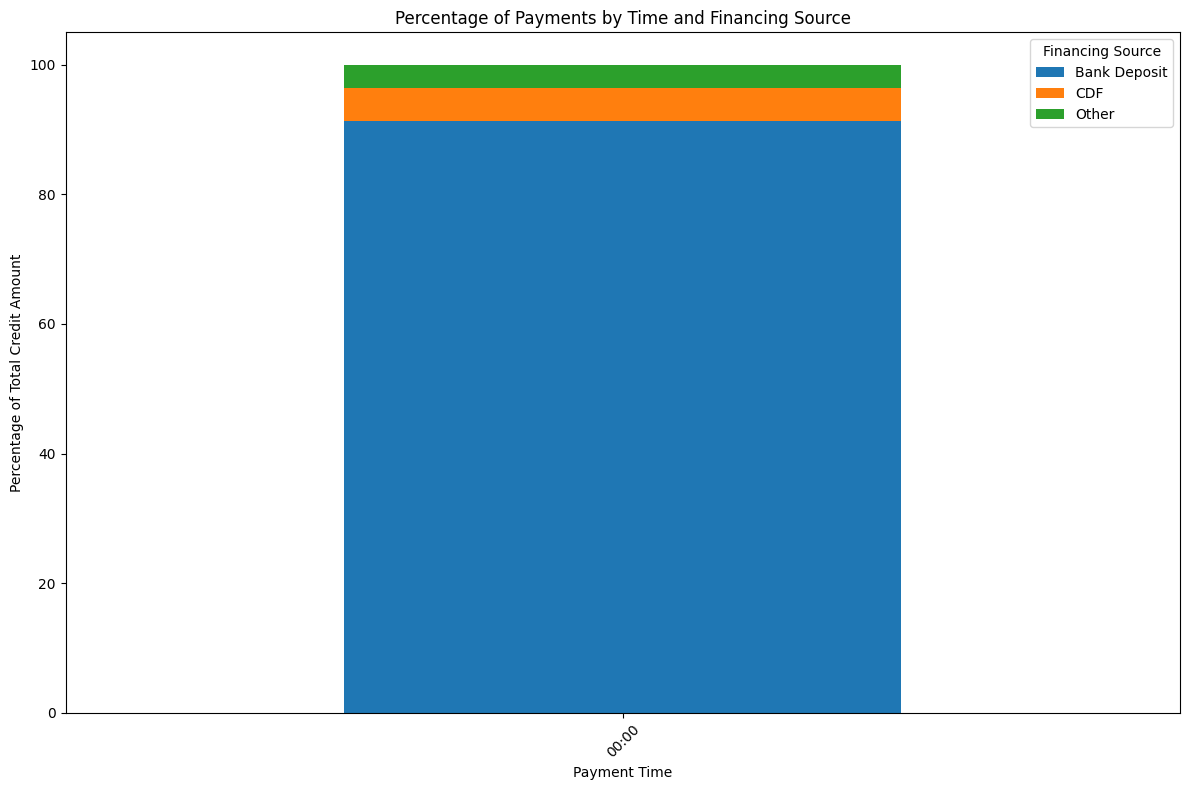

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/StudentData/report.xlsx'
df = pd.read_excel(file_path)

# Clean data
df = df.drop_duplicates()
df['Due Date'] = pd.to_datetime(df['Due Date'])

# Filter out transactions with 'REV' or 'bad debt' in the description
df = df[~df['Description'].str.contains('REV', case=False, na=False)]
df = df[~df['Description'].str.contains('bad debt', case=False, na=False)]
df = df[~df['Description'].str.contains('Rever', case=False, na=False)]


# Extract time from 'Due Date'
df['Payment Time'] = df['Due Date'].dt.strftime('%H:%M')

# Convert 'Credit Amount' to numeric and fill NaNs with 0
df['Credit Amount'] = pd.to_numeric(df['Credit Amount'], errors='coerce').fillna(0)

# Classify financing source
def classify_source(description):
    if 'CDF' in str(description):
        return 'CDF'
    elif 'Bank Deposit' in str(description):
        return 'Bank Deposit'
    else:
        return 'Other'

df['Financing Source'] = df['Description'].apply(classify_source)

# Aggregate data
grouped = df.groupby(['Payment Time', 'Financing Source']).agg({'Credit Amount': 'sum'}).reset_index()

# Pivot table for visualization
pivot_table = grouped.pivot(index='Payment Time', columns='Financing Source', values='Credit Amount').fillna(0)

# Calculate percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting
pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Percentage of Payments by Time and Financing Source')
plt.xlabel('Payment Time')
plt.ylabel('Percentage of Total Credit Amount')
plt.xticks(rotation=45)
plt.legend(title='Financing Source')
plt.tight_layout()
plt.show()

Trial 2: Groups items as percentage

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


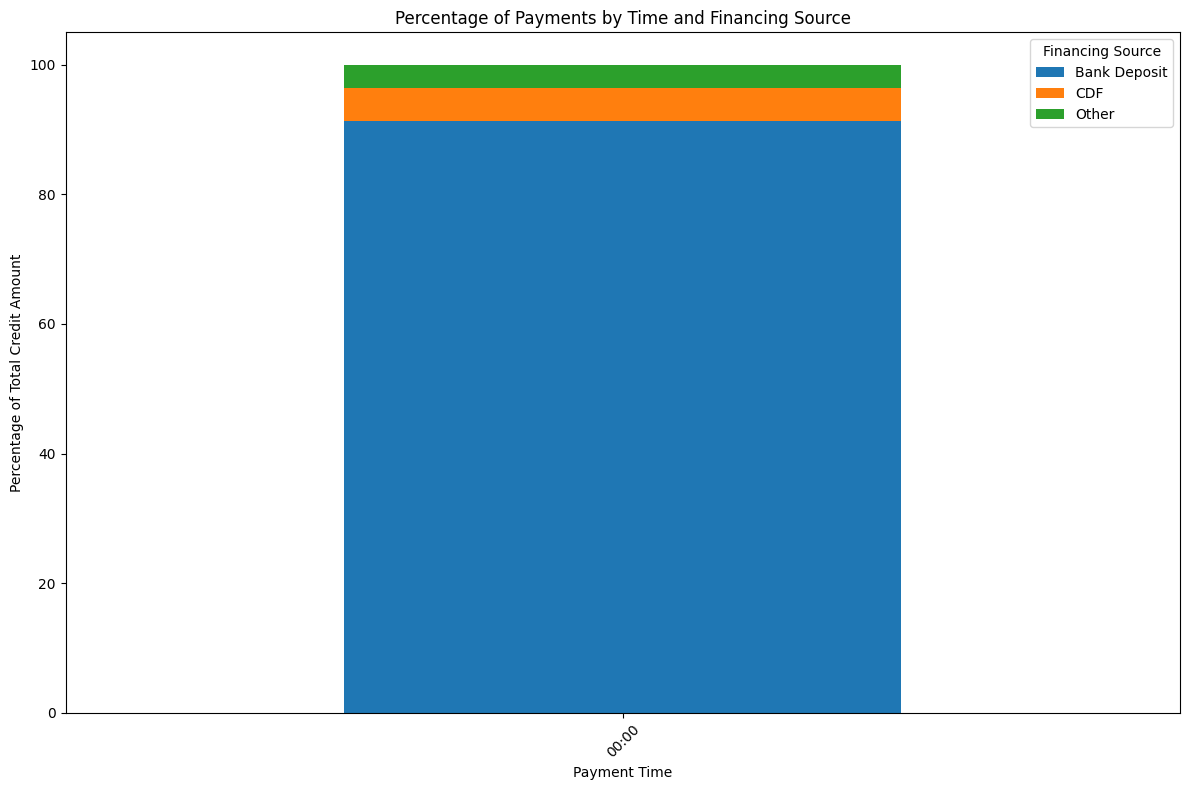

Saved CSV file to /content/drive/MyDrive/StudentData/payments_summary_1.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file paths
base_dir = '/content/drive/MyDrive/StudentData/'
file_path = os.path.join(base_dir, 'report.xlsx')

# Load the data
df = pd.read_excel(file_path)

# Clean data
df = df.drop_duplicates()
df['Due Date'] = pd.to_datetime(df['Due Date'])

# Filter out transactions with 'REV' or 'bad debt' in the description
df = df[~df['Description'].str.contains('REV', case=False, na=False)]
df = df[~df['Description'].str.contains('bad debt', case=False, na=False)]

# Extract time from 'Due Date'
df['Payment Time'] = df['Due Date'].dt.strftime('%H:%M')

# Convert 'Credit Amount' to numeric and fill NaNs with 0
df['Credit Amount'] = pd.to_numeric(df['Credit Amount'], errors='coerce').fillna(0)

# Classify financing source
def classify_source(description):
    if 'CDF' in str(description):
        return 'CDF'
    elif 'Bank Deposit' in str(description):
        return 'Bank Deposit'
    else:
        return 'Other'

df['Financing Source'] = df['Description'].apply(classify_source)

# Aggregate data
grouped = df.groupby(['Payment Time', 'Financing Source']).agg({'Credit Amount': 'sum'}).reset_index()

# Pivot table for visualization
pivot_table = grouped.pivot(index='Payment Time', columns='Financing Source', values='Credit Amount').fillna(0)

# Calculate percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting
pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Percentage of Payments by Time and Financing Source')
plt.xlabel('Payment Time')
plt.ylabel('Percentage of Total Credit Amount')
plt.xticks(rotation=45)
plt.legend(title='Financing Source')
plt.tight_layout()
plt.show()

# Save the list of items to a CSV file
# Create a numbered filename
file_counter = 1
csv_filename = f'payments_summary_{file_counter}.csv'
while os.path.exists(os.path.join(base_dir, csv_filename)):
    file_counter += 1
    csv_filename = f'payments_summary_{file_counter}.csv'

# Save data to CSV
csv_path = os.path.join(base_dir, csv_filename)
grouped.to_csv(csv_path, index=False)
print(f"Saved CSV file to {csv_path}")


Trial 3 (Plots the graph, Writes the values graphed in a CSV, and writes the result of others in a seperate CSV)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


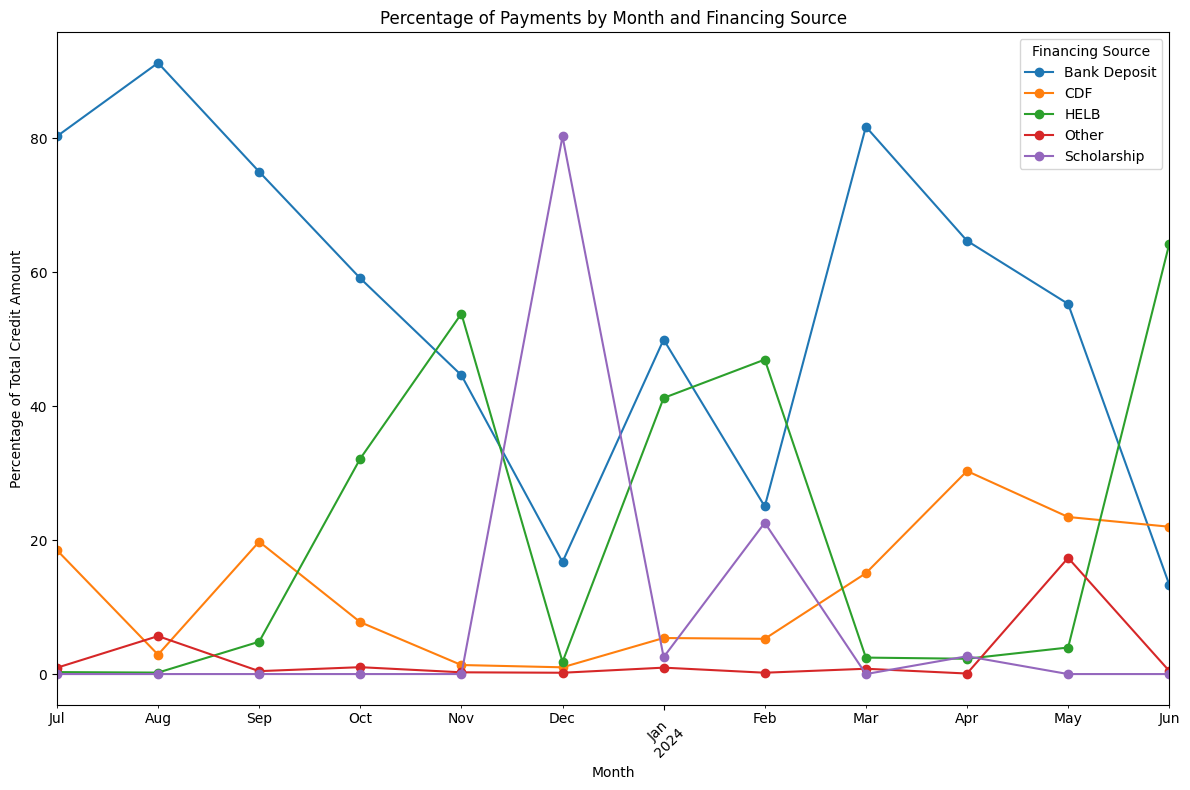

Saved CSV file to /content/drive/MyDrive/StudentData/payments_summary_4.csv
Saved 'Other' transactions to /content/drive/MyDrive/StudentData/other_transactions_4.csv


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file paths
base_dir = '/content/drive/MyDrive/StudentData/'
file_path = os.path.join(base_dir, 'report2.xlsx')

# Load the data
df = pd.read_excel(file_path)

# Clean data
df = df.drop_duplicates()
df['Due Date'] = pd.to_datetime(df['Due Date'])

# Filter out transactions with 'REV' or 'bad debt' in the description
df = df[~df['Description'].str.contains('REV', case=False, na=False)]
df = df[~df['Description'].str.contains('bad debt', case=False, na=False)]
df = df[~df['Description'].str.contains('Fees for', case=False, na=False)]
df = df[~df['Description'].str.contains('supp', case=False, na=False)]

# Filter dates between July 2023 and June 2024
start_date = '2023-07-01'
end_date = '2024-06-30'
df = df[(df['Due Date'] >= start_date) & (df['Due Date'] <= end_date)]

# Extract month from 'Posting Date'
df['Posting Month'] = df['Due Date'].dt.to_period('M')

# Convert 'Credit Amount' to numeric and fill NaNs with 0
df['Credit Amount'] = pd.to_numeric(df['Credit Amount'], errors='coerce').fillna(0)

# Classify financing source
def classify_source(description):
    if 'CQ' in str(description):
        return 'CDF'
    elif 'CDF' in str(description) or 'bursary' in str(description):
        return 'CDF'
    elif 'Bank Deposit' in str(description) or 'check-off' in str(description) or 'ALUMNI BURSARY' in str(description) or 'SAMU BURSARY' in str(description):
        return 'Bank Deposit'
    elif '2524#' in str(description):
        return 'Bank Deposit'
    elif 'TRANS' in str(description) or 'TRNS' in str(description) or '11th' in str(description):
        return 'Bank Deposit'
    elif 'Transfer fee' in str(description):
        return 'Bank Deposit'
    elif 'Unidentified' in str(description) or 'Unid' in str(description):
        return 'Bank Deposit'
    elif 'GOK' in str(description):
        return 'Scholarship'
    elif 'HELB' in str(description):
        return 'HELB'
    else:
        return 'Other'

df['Financing Source'] = df['Description'].apply(classify_source)

# Filter out 'Other' transactions
df_other = df[df['Financing Source'] == 'Other']

# Aggregate data by month for plotting
grouped = df.groupby(['Posting Month', 'Financing Source']).agg({'Credit Amount': 'sum'}).reset_index()
pivot_table = grouped.pivot(index='Posting Month', columns='Financing Source', values='Credit Amount').fillna(0)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting
pivot_table_percentage.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Percentage of Payments by Month and Financing Source')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Credit Amount')
plt.xticks(rotation=45)
plt.legend(title='Financing Source')
plt.tight_layout()
plt.show()

# Save the list of items to a CSV file
file_counter = 1
csv_filename = f'payments_summary_{file_counter}.csv'
while os.path.exists(os.path.join(base_dir, csv_filename)):
    file_counter += 1
    csv_filename = f'payments_summary_{file_counter}.csv'
csv_path = os.path.join(base_dir, csv_filename)
grouped.to_csv(csv_path, index=False)
print(f"Saved CSV file to {csv_path}")

# Save 'Other' transactions to a CSV file
file_counter = 1
other_csv_filename = f'other_transactions_{file_counter}.csv'
while os.path.exists(os.path.join(base_dir, other_csv_filename)):
    file_counter += 1
    other_csv_filename = f'other_transactions_{file_counter}.csv'
other_csv_path = os.path.join(base_dir, other_csv_filename)
df_other.to_csv(other_csv_path, index=False)
print(f"Saved 'Other' transactions to {other_csv_path}")
